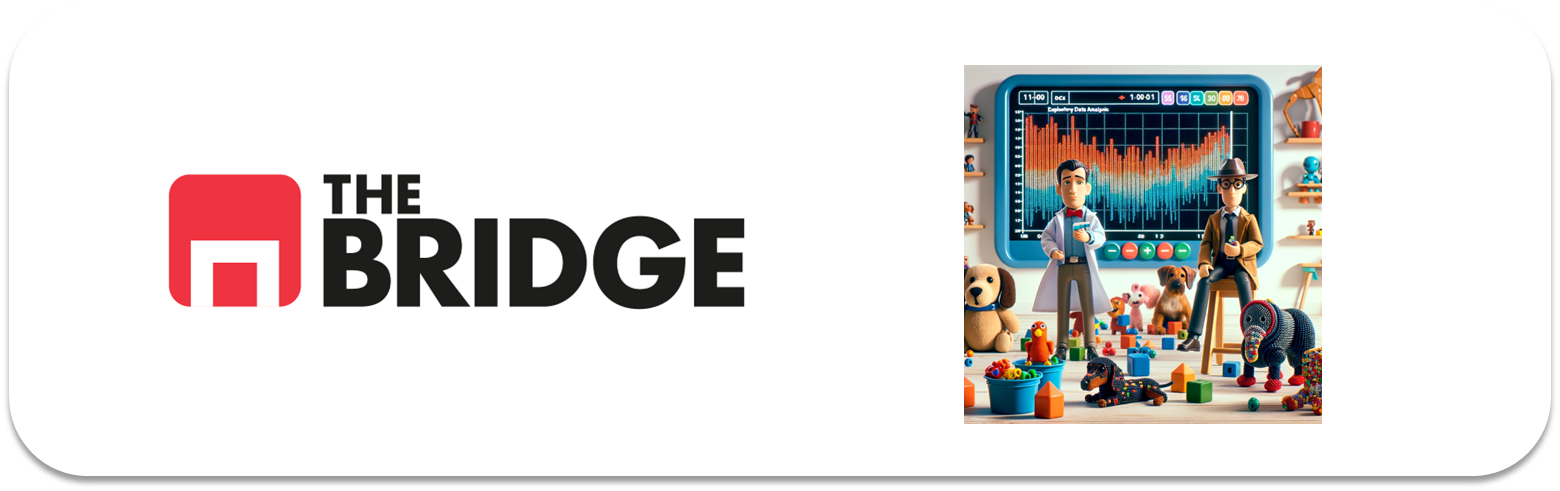

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import *


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [54]:
df = df_titanic.copy()

df.drop(columns=["deck", "pclass", "embarked"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   sex          891 non-null    object 
 2   age          714 non-null    float64
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   class        891 non-null    object 
 7   who          891 non-null    object 
 8   adult_male   891 non-null    bool   
 9   embark_town  889 non-null    object 
 10  alive        891 non-null    object 
 11  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(5)
memory usage: 71.5+ KB


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [55]:
df["family_members"] = df["parch"] + df["sibsp"]
df.drop(columns=["parch", "sibsp"], inplace=True)
df.sample(3)

,survived,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
424,0,male,18.0,20.2125,Third,man,True,Southampton,no,False,2
317,0,male,54.0,14.0000,Second,man,True,Southampton,no,True,0
191,0,male,19.0,13.0000,Second,man,True,Southampton,no,True,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   survived        891 non-null    int64  
 1   sex             891 non-null    object 
 2   age             714 non-null    float64
 3   fare            891 non-null    float64
 4   class           891 non-null    object 
 5   who             891 non-null    object 
 6   adult_male      891 non-null    bool   
 7   embark_town     889 non-null    object 
 8   alive           891 non-null    object 
 9   alone           891 non-null    bool   
 10  family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [57]:
df["embark_town"].fillna(df['embark_town'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   survived        891 non-null    int64  
 1   sex             891 non-null    object 
 2   age             714 non-null    float64
 3   fare            891 non-null    float64
 4   class           891 non-null    object 
 5   who             891 non-null    object 
 6   adult_male      891 non-null    bool   
 7   embark_town     889 non-null    object 
 8   alive           891 non-null    object 
 9   alone           891 non-null    bool   
 10  family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [58]:
df["who"].value_counts()

# Se considerarán diferentes medias de edad: uno para adultos (man/woman) y otro para niños (child).

man      537
woman    271
child     83
Name: who, dtype: int64

In [59]:
mascara_child = df["who"] == "child"
media_child = df.loc[mascara_child, "age"].mean()

mascara_adults = df["who"] != "child"
media_adults = df.loc[mascara_adults, "age"].mean()

print(f"La media de edad de los niños es de {int(media_child)} y de adultos {int(media_adults)}")

La media de edad de los niños es de 6 y de adultos 32


In [60]:
df.loc[mascara_child, "age"] = df.loc[mascara_child, "age"].fillna(media_child)

In [61]:
df.loc[mascara_adults, "age"] = df.loc[mascara_adults, "age"].fillna(media_adults)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   survived        891 non-null    int64  
 1   sex             891 non-null    object 
 2   age             891 non-null    float64
 3   fare            891 non-null    float64
 4   class           891 non-null    object 
 5   who             891 non-null    object 
 6   adult_male      891 non-null    bool   
 7   embark_town     889 non-null    object 
 8   alive           891 non-null    object 
 9   alone           891 non-null    bool   
 10  family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

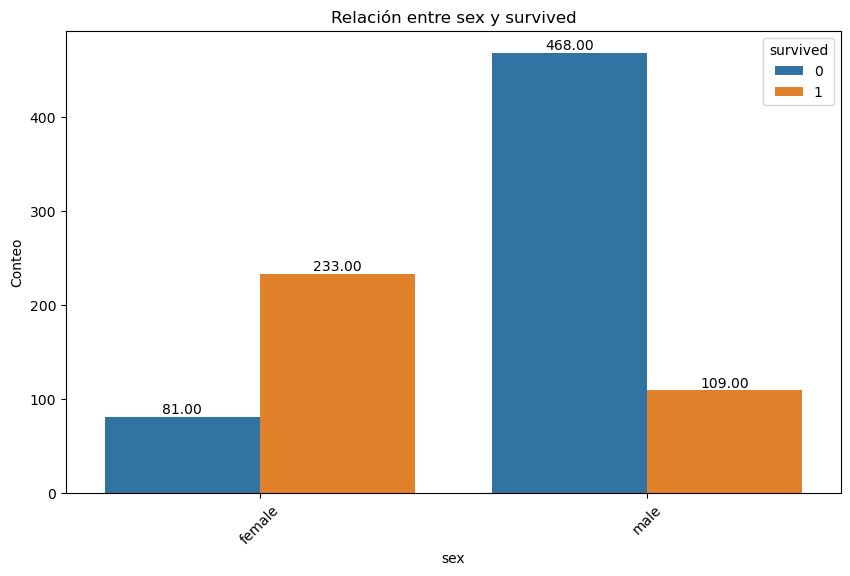

In [117]:
plot_categorical_relationship_fin(df, "sex", "survived", relative_freq = False, show_values = True)

# valores absolutos


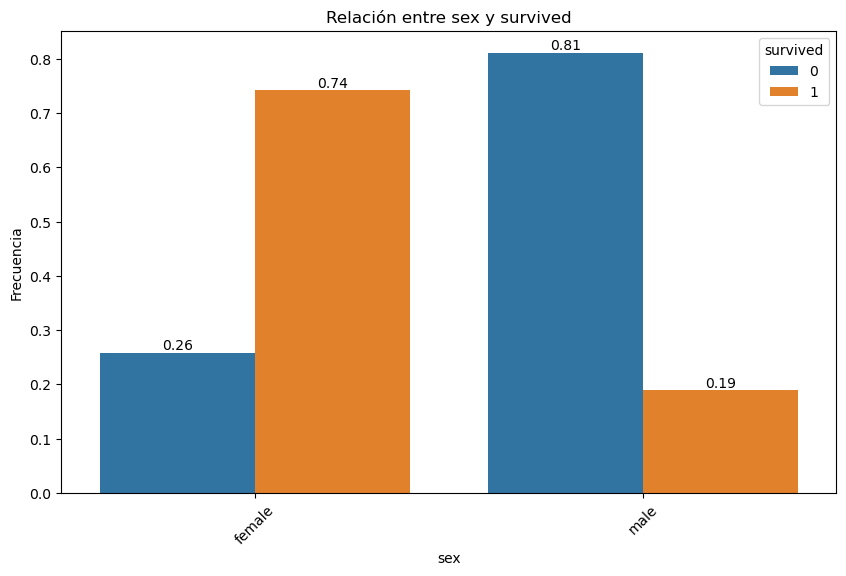

'\nAunque los gráficos muestran claramente que hubo una diferencia significativa en las proporciones de \nmortalidad por sexo, podríamos realizar una prueba U de Mann-Whitney\n'

In [ ]:
# Apartado 1.6.1

plot_categorical_relationship_fin(df, "sex", "survived", relative_freq = True, show_values = True)

'''
Aunque los gráficos muestran claramente que hubo una diferencia significativa en las proporciones de 
mortalidad por sexo, podríamos realizar una prueba U de Mann-Whitney
'''

In [81]:
tabla_contingencia = pd.crosstab(df['sex'], df['survived'])

tabla_contingencia

survived,0,1
sex,,
female,81,233
male,468,109


In [84]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

'''
El valor de chi-cuadrado es mucho menor que 0,05, confirmando la expectativa de una diferencia estadísticamente significativa.
'''

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.1973570627755645e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


'\nEl valor de chi-cuadrado es mucho menor que 0,05, confirmando la expectativa de una diferencia estadísticamente significativa.\n'

In [104]:
# Ahora la diferenza entre adultos y niños
df.loc[mascara_adults & (df['who'] != 'adults'), 'who'] = 'adults'

df["who"].value_counts()


adults    808
child      83
Name: who, dtype: int64

In [106]:
tabla_contingencia_2 = pd.crosstab(df['who'], df['survived'])

tabla_contingencia_2

survived,0,1
who,,
adults,515,293
child,34,49


In [ ]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_2)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

'''
El valor de chi-cuadrado es mucho menor que 0,05, confirmando la expectativa de una diferencia estadísticamente significativa.
'''


Valor Chi-Cuadrado: 15.556993340077092
P-Value: 8.005497211300105e-05
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[497.85858586 310.14141414]
 [ 51.14141414  31.85858586]]


'\nEl valor de chi-cuadrado es mucho menor que 0,05, confirmando la expectativa de una diferencia estadísticamente significativa.\n'

In [ ]:
# Apartado 1.6.2



0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: class, Length: 891, dtype: object

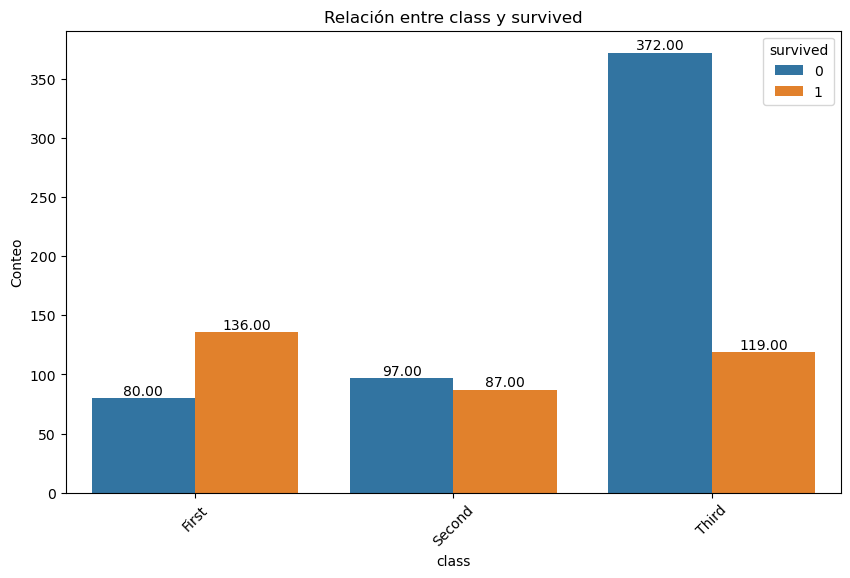

In [ ]:
plot_categorical_relationship_fin(df, "class", "survived", relative_freq = False, show_values = True)

# valores absolutos


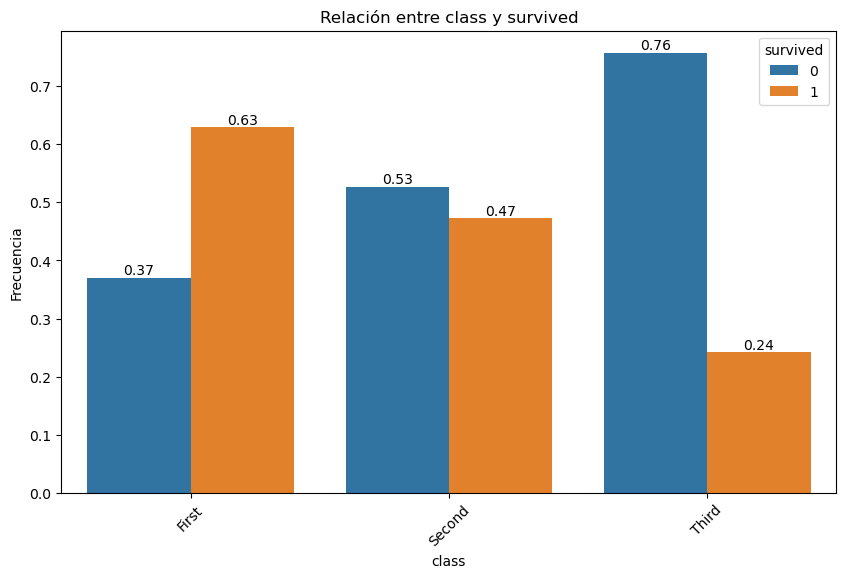

In [ ]:
plot_categorical_relationship_fin(df, "class", "survived", relative_freq = True, show_values = True)

# valores relativos (siguen un patrón similar)


In [111]:
tabla_contingencia_3 = pd.crosstab(df['class'], df['survived'])

tabla_contingencia_3

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [112]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_3)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

'''
El valor de chi-cuadrado es mucho menor que 0,05, confirmando la expectativa de una diferencia estadísticamente significativa.
'''


Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


'\nEl valor de chi-cuadrado es mucho menor que 0,05, confirmando la expectativa de una diferencia estadísticamente significativa.\n'

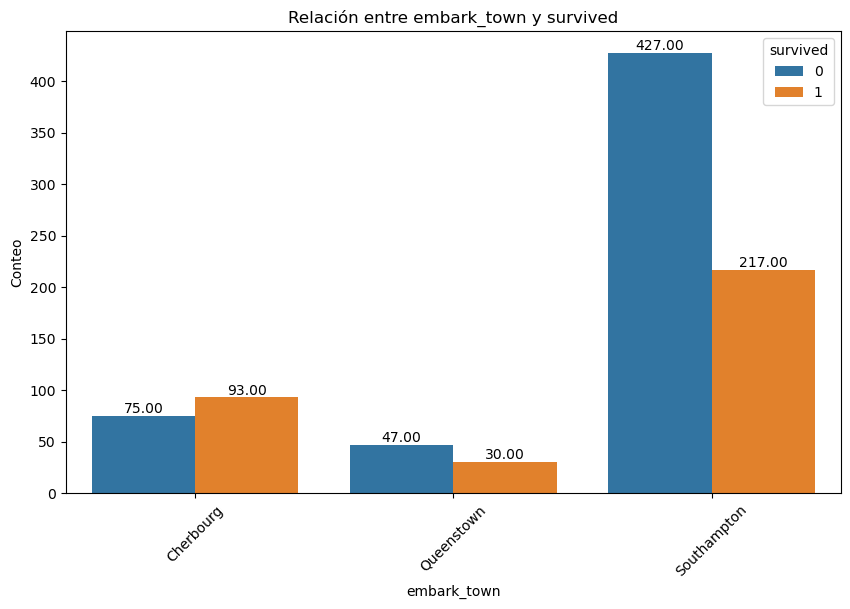

In [113]:
plot_categorical_relationship_fin(df, "embark_town", "survived", relative_freq = False, show_values = True)

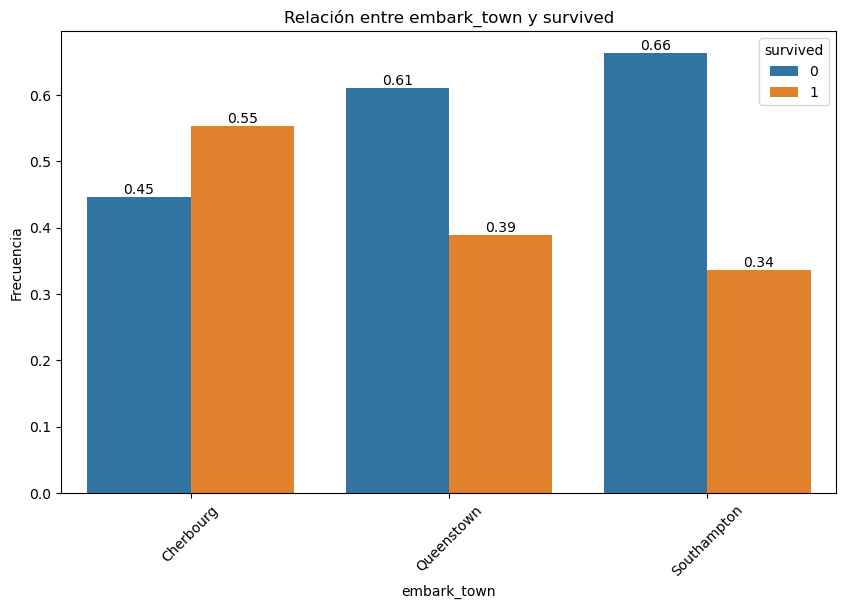

In [114]:
plot_categorical_relationship_fin(df, "embark_town", "survived", relative_freq = True, show_values = True)

In [115]:
# Apartado 1.6.3

tabla_contingencia_4 = pd.crosstab(df['embark_town'], df['survived'])

tabla_contingencia_4

survived,0,1
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,217


In [ ]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_4)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

'''
El valor de chi-cuadrado es menor que 0,05, confirmando la expectativa de una diferencia estadísticamente significativa.
'''

Valor Chi-Cuadrado: 26.48914983923762
P-Value: 1.769922284120912e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.7480315  64.2519685]
 [ 47.5511811  29.4488189]
 [397.7007874 246.2992126]]


'\nEl valor de chi-cuadrado es mucho menor que 0,05, confirmando la expectativa de una diferencia estadísticamente significativa.\n'

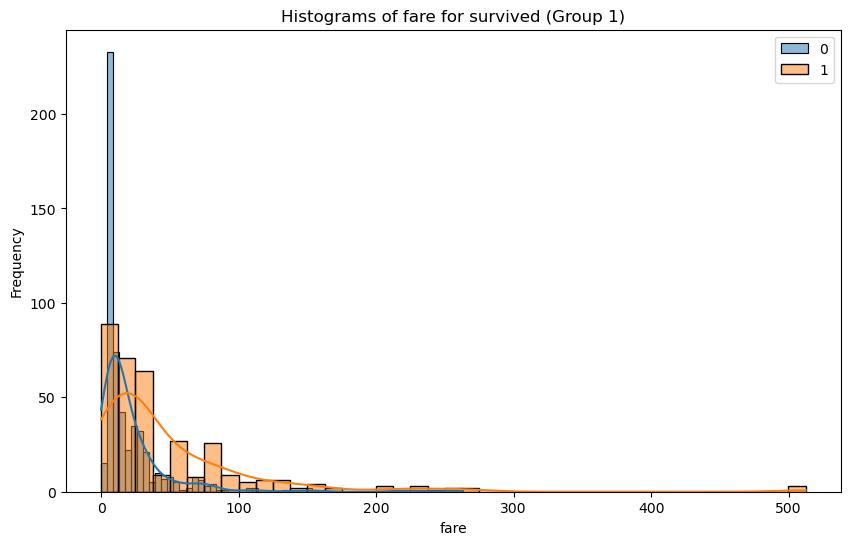

In [120]:
# Apartado 1.6.4
# Relación Categórico-Numérica

plot_grouped_histograms(df, cat_col="survived",num_col="fare", group_size= 2)

In [ ]:
from scipy.stats import mannwhitneyu

# Prueba U de Mann-Whitney

grupo_a = df.loc[df.survived == 1]["fare"]
grupo_b = df.loc[df.survived == 0]["fare"]

In [125]:
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

'''
El valor de chi-cuadrado es mucho menor que 0,05, confirmando la expectativa de una diferencia estadísticamente significativa.
'''

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


'\nEl valor de chi-cuadrado es mucho menor que 0,05, confirmando la expectativa de una diferencia estadísticamente significativa.\n'

In [133]:
# Apartado 1.6.5

df.loc[df["fare"] == 0]

,survived,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,woman
179,0,male,36.000000,0.0,Third,adults,True,Southampton,no,True,0,adults
263,0,male,40.000000,0.0,First,adults,True,Southampton,no,True,0,adults
271,1,male,25.000000,0.0,Third,adults,True,Southampton,yes,True,0,adults
277,0,male,32.767829,0.0,Second,adults,True,Southampton,no,True,0,adults
302,0,male,19.000000,0.0,Third,adults,True,Southampton,no,True,0,adults
413,0,male,32.767829,0.0,Second,adults,True,Southampton,no,True,0,adults
466,0,male,32.767829,0.0,Second,adults,True,Southampton,no,True,0,adults
481,0,male,32.767829,0.0,Second,adults,True,Southampton,no,True,0,adults
597,0,male,49.000000,0.0,Third,adults,True,Southampton,no,True,0,adults
633,0,male,32.767829,0.0,First,adults,True,Southampton,no,True,0,adults


In [134]:
'''
Hay 15 personas que no pagaron, todas ellas hombres viajando solos desde Southampton, aunque pertenecen a diferentes clases. 
No se puede determinar el motivo por el cual no pagaron o si fue simplemente un error en la escritura de la base de datos.
'''

'\nHay 15 personas que no pagaron, todas ellas hombres viajando solos desde Southampton, aunque pertenecen a diferentes clases. \nNo se puede determinar el motivo por el cual no pagaron o si fue simplemente un error en la escritura de la base de datos.\n'

In [ ]:
df[df["fare"] == df["fare"].max()]

# Las tres personas sobrevivieran

,survived,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,woman
258,1,female,35.0,512.3292,First,adults,False,Cherbourg,yes,True,0,NaN
679,1,male,36.0,512.3292,First,adults,True,Cherbourg,yes,False,1,adults
737,1,male,35.0,512.3292,First,adults,True,Cherbourg,yes,True,0,adults


<Axes: xlabel='embark_town', ylabel='fare'>

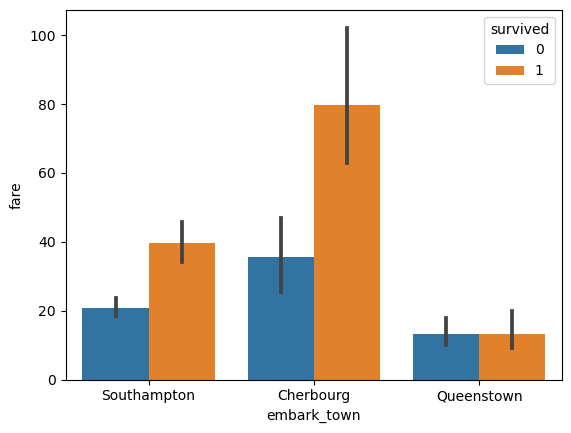

In [154]:
# Apartado 1.6.6

sns.barplot(x='embark_town', y='fare', hue='survived', data=df)


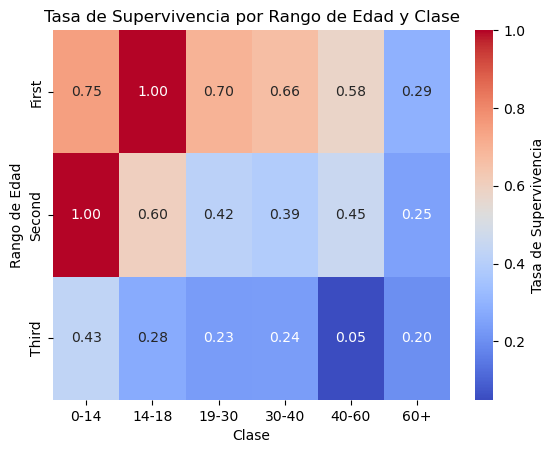

In [ ]:
# Apartado 1.6.7

# Rangos de edad

rangos = [0, 14, 18, 30, 40, 60, 100]

franjas_edad = ['0-14', '14-18', '19-30', '30-40', '40-60', '60+']

df['rangos_edad'] = pd.cut(df['age'], bins=rangos, labels=franjas_edad, right=False)

# Agrupar por clase y rango de edad
survival_by_class_age = df.groupby(['class', 'rangos_edad', 'survived']).size().unstack(fill_value=0)

# Calcular la proporción de sobrevivientes
survival_by_class_age['survival_rate'] = survival_by_class_age[1] / (survival_by_class_age[0] + survival_by_class_age[1])


# Mapa de calor
survival_by_class_age_pivot = survival_by_class_age['survival_rate'].unstack()
sns.heatmap(survival_by_class_age_pivot, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Tasa de Supervivencia'})
plt.title('Tasa de Supervivencia por Rango de Edad y Clase')
plt.xlabel('Clase')
plt.ylabel('Rango de Edad')
plt.show()

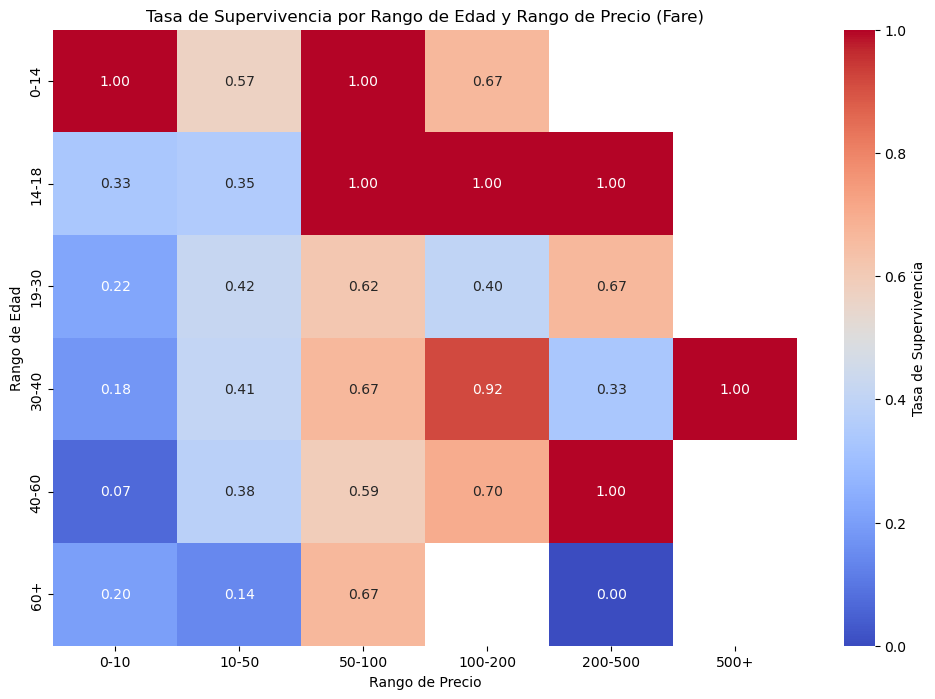

In [185]:
# 1.6.8

# Utilizando los mismos rangos de edad

rango_fare = [0, 10, 50, 100, 200, 500, 1000]
franjas_fare = ['0-10', '10-50', '50-100', '100-200', '200-500', '500+']
df['fare_group'] = pd.cut(df['fare'], bins=rango_fare, labels=franjas_fare, right=False)

survival_by_age_fare = df.groupby(['age_group', 'fare_group', 'survived']).size().unstack(fill_value=0)
survival_by_age_fare['survival_rate'] = survival_by_age_fare[1] / (survival_by_age_fare[0] + survival_by_age_fare[1])

survival_rate_pivot = survival_by_age_fare['survival_rate'].unstack()

# Mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(survival_rate_pivot, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Tasa de Supervivencia'})
plt.title('Tasa de Supervivencia por Rango de Edad y Rango de Precio (Fare)')
plt.xlabel('Rango de Precio')
plt.ylabel('Rango de Edad')
plt.show()

In [169]:
'''
Resumidamente, las variables que más determinaban la supervivencia o no son la edad 
(cuanto más joven, más posibilidades de sobrevivir), la clase social y la tarifa pagada
 (la tercera clase tiene más muertes), y el sexo (las mujeres sobreviven más). Estos 
 factores se combinan, es decir, las mujeres jóvenes de primera clase tienen muchas más 
 probabilidades de haber sobrevivido que los hombres mayores de tercera clase, por ejemplo.
'''

'\nResumidamente, las variables que más determinaban la supervivencia o no son la edad \n(cuanto más joven, más posibilidades de sobrevivir), la clase social y la tarifa pagada\n (la tercera clase tiene más muertes), y el sexo (las mujeres sobreviven más). Estos \n factores se combinan, es decir, las mujeres jóvenes de primera clase tienen muchas más \n probabilidades de haber sobrevivido que los hombres mayores de tercera clase, por ejemplo.\n'

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [173]:
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")

In [174]:
df_viajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aircompany  600 non-null    object 
 1   origen      600 non-null    object 
 2   destino     600 non-null    object 
 3   distancia   600 non-null    int64  
 4   avion       600 non-null    object 
 5   con_escala  600 non-null    bool   
 6   consumo_kg  600 non-null    float64
 7   duracion    600 non-null    int64  
 8   ingresos    600 non-null    float64
 9   id_vuelo    600 non-null    object 
 10  mes         600 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 47.6+ KB


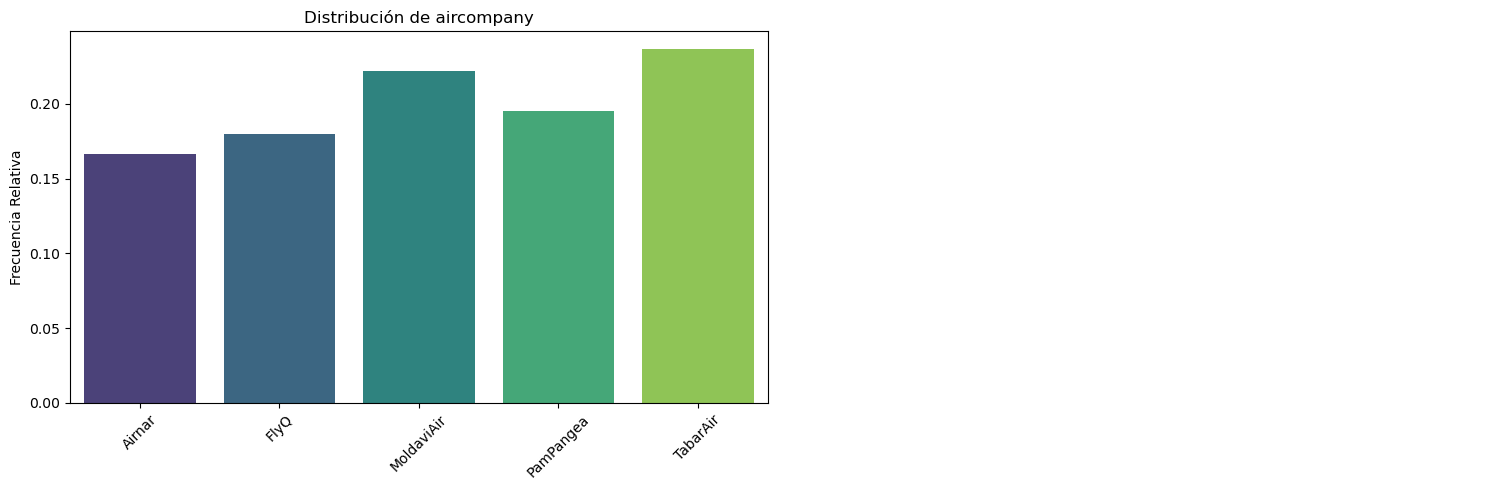

In [177]:
pinta_distribucion_categoricas(df_viajes,["aircompany"], relativa= True)

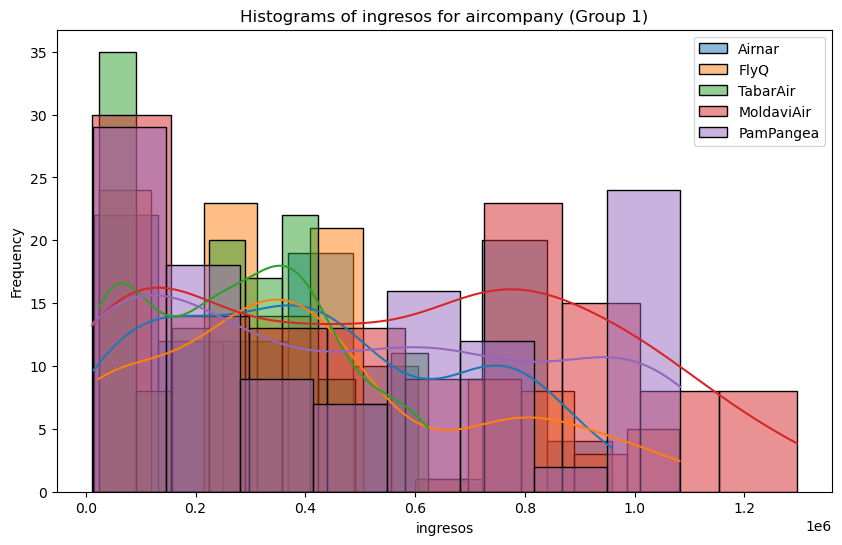

In [178]:
plot_grouped_histograms(df_viajes, "aircompany","ingresos",group_size= 5)

In [180]:
'''
Está claro que la empresa TabarAir genera más ingresos a partir de vuelos más baratos, 
posiblemente de bajo costo y/o de corta duración, un patrón similar al de FlyQ (posible 
competidor fuerte) y diferente al de MoldavAir, por ejemplo.
'''

'\nEstá claro que la empresa TabarAir genera más ingresos a partir de vuelos más baratos, \nposiblemente de bajo costo y/o de corta duración, un patrón similar al de FlyQ (posible \ncompetidor fuerte) y diferente al de MoldavAir, por ejemplo.\n'

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

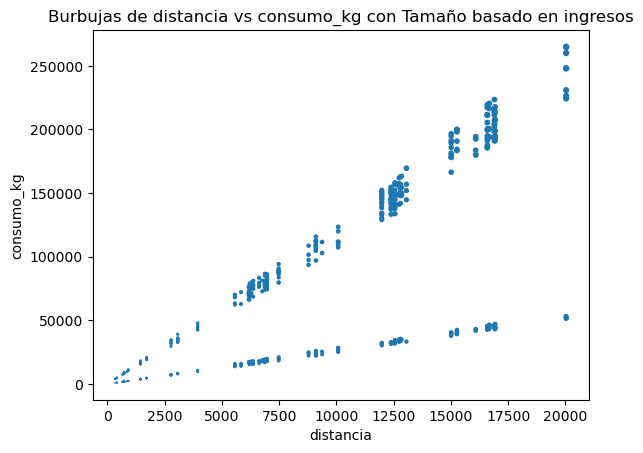

In [181]:
bubble_plot(df_viajes,"distancia","consumo_kg","ingresos", scale = 100000)

In [182]:
'''
Los vuelos de media distancia parecen interesantes de abordar, porque parecen tener una excelente relación consumo_kg/ingresos.
'''

'\nLos vuelos de media distancia parecen interesantes de abordar, porque parecen tener una excelente relación consumo_kg/ingresos.\n'

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [197]:
rango_distancia = [0, 5000, 10000, 15000, 20000]
categorias_distancia = ["CD", "MD", "LD", "ULD"]
df_viajes['cat_vuelo'] = pd.cut(df_viajes['distancia'], bins=rango_distancia, labels=categorias_distancia, right=False)

df_viajes


,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,CD
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,LD
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,MD
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,MD
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,MD
...,...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23,LD
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23,CD
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23,MD
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23,LD


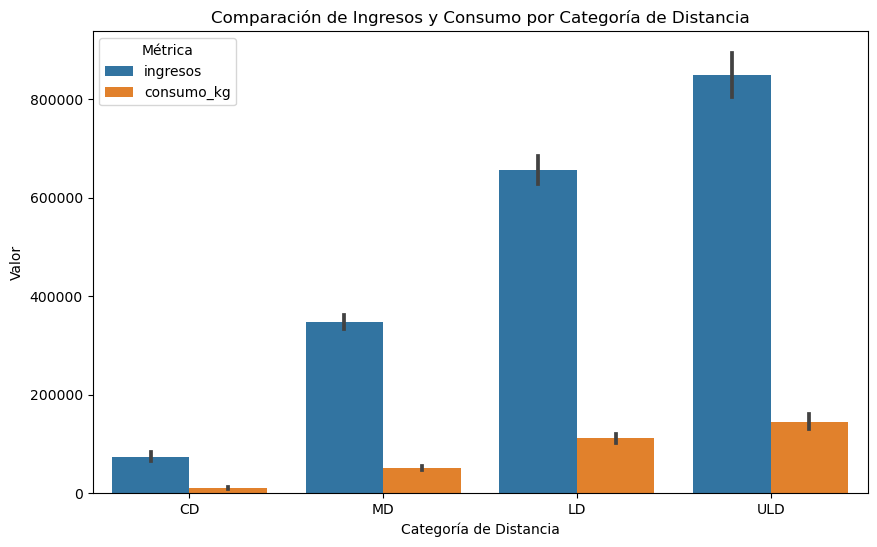

In [203]:
df_melted = df_viajes.melt(id_vars='cat_vuelo', value_vars=['ingresos', 'consumo_kg'], var_name='Métrica', value_name='Valor')

# Creando el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='cat_vuelo', y='Valor', hue='Métrica', data=df_melted)
plt.title('Comparación de Ingresos y Consumo por Categoría de Distancia')
plt.xlabel('Categoría de Distancia')
plt.ylabel('Valor')
plt.show()

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.